<a href="https://colab.research.google.com/github/ashleyak7/MSCI-151-week-1-workshops/blob/main/CW4_AAK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

excel_file_path = '/content/sample_data/MSCI151 Data.xlsx'
df = pd.read_excel(excel_file_path)
print(df.columns)

Index(['id', 'Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size',
       'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender'],
      dtype='object')


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming df is already loaded from 'MSCI151 Data.xlsx'

# Define features (X) and target (y)
feature_cols = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender']
X = df[feature_cols]
y = df['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest Model Evaluation for 'Profitability':")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Random Forest Model Evaluation for 'Profitability':
Mean Absolute Error (MAE): 8.49
Mean Squared Error (MSE): 113.68
R-squared (R2): -1.47


In [46]:
df = pd.read_excel('/content/sample_data/MSCI151 coursework 4 Data.new.xlsx')
print(df.columns)

Index(['id', 'Profitability', 'debt', 'RnD', 'Firm Age', 'Firm Size',
       'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender',
       'Marketing', 'Product_sentiment', 'Politicans', 'PoB'],
      dtype='object')


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming df is already loaded from 'MSCI151 coursework 4 Data.new.xlsx'

# Define features (X) and target (y)
feature_cols_new_data = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'Politicans', 'PoB']
X_new_data = df[feature_cols_new_data]
y_new_data = df['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train_new_data, X_test_new_data, y_train_new_data, y_test_new_data = train_test_split(
    X_new_data, y_new_data, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_new_data = RandomForestRegressor(n_estimators=100, random_state=42)
model_new_data.fit(X_train_new_data, y_train_new_data)

# Make predictions on the test set
y_pred_new_data = model_new_data.predict(X_test_new_data)

# Evaluate the model
mae_new_data = mean_absolute_error(y_test_new_data, y_pred_new_data)
mse_new_data = mean_squared_error(y_test_new_data, y_pred_new_data)
r2_new_data = r2_score(y_test_new_data, y_pred_new_data)

print(f"Random Forest Model Evaluation for 'Profitability' (New Data):")
print(f"Mean Absolute Error (MAE): {mae_new_data:.2f}")
print(f"Mean Squared Error (MSE): {mse_new_data:.2f}")
print(f"R-squared (R2): {r2_new_data:.2f}")

Random Forest Model Evaluation for 'Profitability' (New Data):
Mean Absolute Error (MAE): 8.33
Mean Squared Error (MSE): 112.53
R-squared (R2): -1.44


In [49]:
# Get feature importances from the Random Forest model trained on new data
feature_importances_new_data = model_new_data.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_new_data = pd.Series(feature_importances_new_data, index=X_new_data.columns)

# Sort the features by importance
sorted_feature_importances_new_data = feature_importance_series_new_data.sort_values(ascending=False)

# Print the feature importance scores
print("Random Forest Feature Importances (New Data):")
display(sorted_feature_importances_new_data)

Random Forest Feature Importances (New Data):


,0
debt,0.295454
CEO Gender,0.154521
Firm Size,0.141393
RnD,0.108190
Product_sentiment,0.061330
Politicans,0.050223
Firm Age,0.044568
Marketing,0.044484
CEO Experience,0.035701
foreign sales,0.033287


In [51]:
from sklearn.linear_model import Lasso
import pandas as pd

# Load the dataframe
excel_file_path = '/content/sample_data/MSCI151 coursework 4 Data.new.xlsx'
df_new = pd.read_excel(excel_file_path)

# Define the features (X) and the target variable (y)
feature_cols_lasso = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_lasso = df_new[feature_cols_lasso]
y_lasso = df_new['Profitability']

# Initialize and fit the LASSO model
# You might need to tune the alpha parameter based on your data
lasso = Lasso(alpha=0.1) # alpha is the regularization strength
lasso.fit(X_lasso, y_lasso)

# Get the coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X_lasso.columns)

# Print the coefficients
print("LASSO Coefficients:")
print(lasso_coefficients)

LASSO Coefficients:
debt                -0.189645
RnD                  0.024599
Firm Age            -2.482502
Firm Size            0.491453
CEO Experience       1.945461
foreign sales       -0.020908
CEO education        2.205056
CEO Gender           9.904784
Marketing           -3.889431
Product_sentiment   -0.000000
PoB                 -0.000000
dtype: float64


In [52]:
from sklearn.linear_model import Lasso
import pandas as pd

# Assuming df_new is already loaded from 'MSCI151 coursework 4 Data.new.xlsx'

# Define the reduced set of features (X)
feature_cols_reduced_lasso = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing']
X_reduced_lasso = df_new[feature_cols_reduced_lasso]
y_reduced_lasso = df_new['Profitability']

# Initialize and fit the LASSO model with the reduced feature set
# You might need to tune the alpha parameter based on your data
lasso_reduced = Lasso(alpha=0.1) # alpha is the regularization strength
lasso_reduced.fit(X_reduced_lasso, y_reduced_lasso)

# Get the coefficients
lasso_coefficients_reduced = pd.Series(lasso_reduced.coef_, index=X_reduced_lasso.columns)

# Print the coefficients
print("LASSO Coefficients (Reduced Features - Product_sentiment and PoB removed):")
print(lasso_coefficients_reduced)

LASSO Coefficients (Reduced Features - Product_sentiment and PoB removed):
debt             -0.189645
RnD               0.024599
Firm Age         -2.482502
Firm Size         0.491453
CEO Experience    1.945461
foreign sales    -0.020908
CEO education     2.205056
CEO Gender        9.904784
Marketing        -3.889431
dtype: float64


In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming df_new is already loaded from 'MSCI151 coursework 4 Data.new.xlsx'

# Define features (X) and target (y)
feature_cols_rf = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing']
X_rf = df_new[feature_cols_rf]
y_rf = df_new['Profitability']

# Split data into training and testing sets (80/20 rule)
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
model_rf = RandomForestRegressor(n_estimators=100, random_state=42)
model_rf.fit(X_train_rf, y_train_rf)

# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test_rf)

# Evaluate the model
mae_rf = mean_absolute_error(y_test_rf, y_pred_rf)
mse_rf = mean_squared_error(y_test_rf, y_pred_rf)
r2_rf = r2_score(y_test_rf, y_pred_rf)

print(f"Random Forest Model Evaluation for 'Profitability' (Reduced Features):")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"R-squared (R2): {r2_rf:.2f}")

Random Forest Model Evaluation for 'Profitability' (Reduced Features):
Mean Absolute Error (MAE): 8.54
Mean Squared Error (MSE): 115.23
R-squared (R2): -1.50


In [54]:
# Get feature importances from the Random Forest model
feature_importances_rf = model_rf.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_rf = pd.Series(feature_importances_rf, index=X_rf.columns)

# Sort the features by importance
sorted_feature_importances_rf = feature_importance_series_rf.sort_values(ascending=False)

# Print the feature importance scores
print("Random Forest Feature Importances (Reduced Features):")
print(sorted_feature_importances_rf)

Random Forest Feature Importances (Reduced Features):
debt              0.320011
Firm Size         0.158812
CEO Gender        0.155239
RnD               0.122000
foreign sales     0.058545
Marketing         0.054101
CEO Experience    0.053045
Firm Age          0.052659
CEO education     0.025588
dtype: float64


In [55]:
import pandas as pd
import statsmodels.api as sm

# Load the dataframe
excel_file_path = '/content/sample_data/MSCI151 coursework 4 Data.new.xlsx'
df_new = pd.read_excel(excel_file_path)

# Define the features (X) and the target variable (y)
feature_cols_ols = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_ols = df_new[feature_cols_ols]
y_ols = df_new['Profitability']

# Add a constant (intercept) to the features
X_ols = sm.add_constant(X_ols)

# Create and fit the OLS model with robust standard errors
model_ols = sm.OLS(y_ols, X_ols)
results_ols = model_ols.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print("OLS Regression Results (with Robust Standard Errors):")
print(results_ols.summary())

OLS Regression Results (with Robust Standard Errors):
                            OLS Regression Results                            
Dep. Variable:          Profitability   R-squared:                       0.284
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     4.859
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           4.35e-06
Time:                        13:45:51   Log-Likelihood:                -465.15
No. Observations:                 122   AIC:                             954.3
Df Residuals:                     110   BIC:                             988.0
Df Model:                          11                                         
Covariance Type:                  HC1                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------

In [56]:
import pandas as pd
import statsmodels.api as sm

# Assuming df_new and results_ols are available from previous steps

# Get OLS coefficients and p-values from the previous model
ols_pvalues = results_ols.pvalues

# Filter: keep only variables with p <= 0.1
significant_vars = ols_pvalues[ols_pvalues <= 0.1].index.tolist()

# Remove the 'const' if it's included, as it's added separately
if 'const' in significant_vars:
    significant_vars.remove('const')

# Define the reduced set of features (X) based on the significant variables
X_ols_reduced_pvalue = df_new[significant_vars]
y_ols_reduced_pvalue = df_new['Profitability'] # Target variable remains the same

# Add a constant (intercept) to the features
X_ols_reduced_pvalue = sm.add_constant(X_ols_reduced_pvalue)

# Create and fit the OLS model with robust standard errors using the reduced feature set
model_ols_reduced_pvalue = sm.OLS(y_ols_reduced_pvalue, X_ols_reduced_pvalue)
results_ols_reduced_pvalue = model_ols_reduced_pvalue.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print("OLS Regression Results for 'Profitability' (Features with P <= 0.1, with Robust Standard Errors):")
print(results_ols_reduced_pvalue.summary())

OLS Regression Results for 'Profitability' (Features with P <= 0.1, with Robust Standard Errors):
                            OLS Regression Results                            
Dep. Variable:          Profitability   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     11.62
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           1.00e-06
Time:                        13:49:22   Log-Likelihood:                -468.45
No. Observations:                 122   AIC:                             944.9
Df Residuals:                     118   BIC:                             956.1
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Assuming df_new is already loaded from 'MSCI151 coursework 4 Data.new.xlsx'

# Define the features for PCA
feature_cols_pca = ['debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_pca = df_new[feature_cols_pca]

# Standardize the features
scaler = StandardScaler()
X_pca_scaled = scaler.fit_transform(X_pca)

# Perform PCA
pca = PCA()
X_pca_transformed = pca.fit_transform(X_pca_scaled)

# Get the loading factors
loading_factors = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=feature_cols_pca)

# Display the loading factors
print("PCA Loading Factors:")
display(loading_factors)

PCA Loading Factors:


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
debt,-0.137278,-0.264457,0.022901,0.199147,0.722276,0.296221,0.215842,-0.294717,-0.051103,0.254185,-0.246853
RnD,0.248985,0.035718,-0.381083,-0.424983,0.306896,0.225746,-0.435789,0.052962,-0.330938,-0.375934,-0.148950
Firm Age,0.404094,0.187400,-0.206086,0.427116,0.057615,-0.193697,0.049725,-0.367041,0.402574,-0.436375,-0.214877
Firm Size,0.296997,0.307233,0.013418,0.239870,-0.011418,0.430006,0.502840,0.509018,-0.220833,-0.107119,-0.049588
CEO Experience,0.142157,0.662708,-0.199195,0.106621,0.154872,-0.057999,-0.206587,-0.183443,-0.122456,0.539916,0.281742
foreign sales,-0.204697,0.382921,0.396491,-0.280492,0.082339,-0.163574,0.336616,-0.409492,-0.354229,-0.366229,0.038183
CEO education,0.516262,-0.285947,0.300485,-0.088410,0.049326,0.262396,-0.000283,-0.230399,0.070828,-0.044015,0.649829
CEO Gender,0.487960,0.037835,0.408698,-0.311446,-0.142420,-0.031440,-0.041835,-0.066371,0.053186,0.353246,-0.584288
Marketing,0.010582,-0.078730,0.393992,0.584490,-0.075232,-0.015253,-0.484383,0.003050,-0.487396,-0.105716,-0.087012
Product_sentiment,-0.189455,0.320349,0.446839,-0.056394,0.362265,0.140669,-0.314620,0.326805,0.521414,-0.168295,0.040387


In [62]:
# Assuming max_loading_per_feature is available from the previous cell

print("Highest PCA Loading per Feature:")
display(max_loading_per_feature)

Highest PCA Loading per Feature:


,Highest Absolute Loading,Principal Component (PC)
debt,0.722276,PC5
PoB,0.720339,PC6
CEO Experience,0.662708,PC2
CEO education,0.649829,PC11
Marketing,0.584490,PC4
CEO Gender,0.584288,PC11
Product_sentiment,0.521414,PC9
Firm Size,0.509018,PC8
Firm Age,0.436375,PC10
RnD,0.435789,PC7


In [61]:
# Find max loading per feature
abs_loading = loading_factors.abs()

max_loading_per_feature = pd.DataFrame({
    'Highest Absolute Loading': abs_loading.max(axis=1),
    'Principal Component (PC)': abs_loading.idxmax(axis=1)
}).sort_values(by='Highest Absolute Loading', ascending=False)

# Filter by loading strength (≥ 0.5) and store in important_pca_features
important_pca_features = max_loading_per_feature[max_loading_per_feature['Highest Absolute Loading'] >= 0.5]

print("Features with Highest PCA Loading >= 0.5:")
display(important_pca_features)

Features with Highest PCA Loading >= 0.5:


,Highest Absolute Loading,Principal Component (PC)
debt,0.722276,PC5
PoB,0.720339,PC6
CEO Experience,0.662708,PC2
CEO education,0.649829,PC11
Marketing,0.584490,PC4
CEO Gender,0.584288,PC11
Product_sentiment,0.521414,PC9
Firm Size,0.509018,PC8


In [63]:
# Find max loading per feature
abs_loading = loading_factors.abs()

max_loading_per_feature = pd.DataFrame({
    'Highest Absolute Loading': abs_loading.max(axis=1),
    'Principal Component (PC)': abs_loading.idxmax(axis=1)
}).sort_values(by='Highest Absolute Loading', ascending=False)

# Filter by loading strength (≥ 0.5) and store in important_pca_features
important_pca_features = max_loading_per_feature[max_loading_per_feature['Highest Absolute Loading'] >= 0.7]

print("Features with Highest PCA Loading >= 0.7:")
display(important_pca_features)

Features with Highest PCA Loading >= 0.7:


,Highest Absolute Loading,Principal Component (PC)
debt,0.722276,PC5
PoB,0.720339,PC6


In [64]:
import pandas as pd

# Assuming sorted_feature_importances_new_data, lasso_coefficients, and results_ols are available from previous steps

# Combine feature importances/coefficients from different models into a single DataFrame
comparison_table_all = pd.DataFrame({
    'Random Forest Importance': sorted_feature_importances_new_data,
    'LASSO Coefficients': lasso_coefficients,
    'OLS Coefficients': results_ols.params[1:], # Exclude the constant
    'OLS P-values': results_ols.pvalues[1:] # Exclude the constant
}).fillna(0) # Fill NaN values with 0 where a feature wasn't used by a model

# Display the comparison table
print("Feature Importance/Coefficient Comparison (All Methods):")
display(comparison_table_all)

Feature Importance/Coefficient Comparison (All Methods):


,Random Forest Importance,LASSO Coefficients,OLS Coefficients,OLS P-values
CEO Experience,0.035701,1.945461,2.515558,0.267902
CEO Gender,0.154521,9.904784,10.452346,0.000125
CEO education,0.023244,2.205056,2.577793,0.315466
Firm Age,0.044568,-2.482502,-3.239771,0.275569
Firm Size,0.141393,0.491453,0.505903,0.522408
Marketing,0.044484,-3.889431,-4.975219,0.061662
PoB,0.007604,-0.000000,-0.029519,0.990309
Politicans,0.050223,0.000000,0.000000,0.000000
Product_sentiment,0.061330,-0.000000,-0.676783,0.847247
RnD,0.108190,0.024599,0.021200,0.234997


/tmp/ipython-input-2609587530.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importance.index, y=rf_importance.values, palette='viridis')


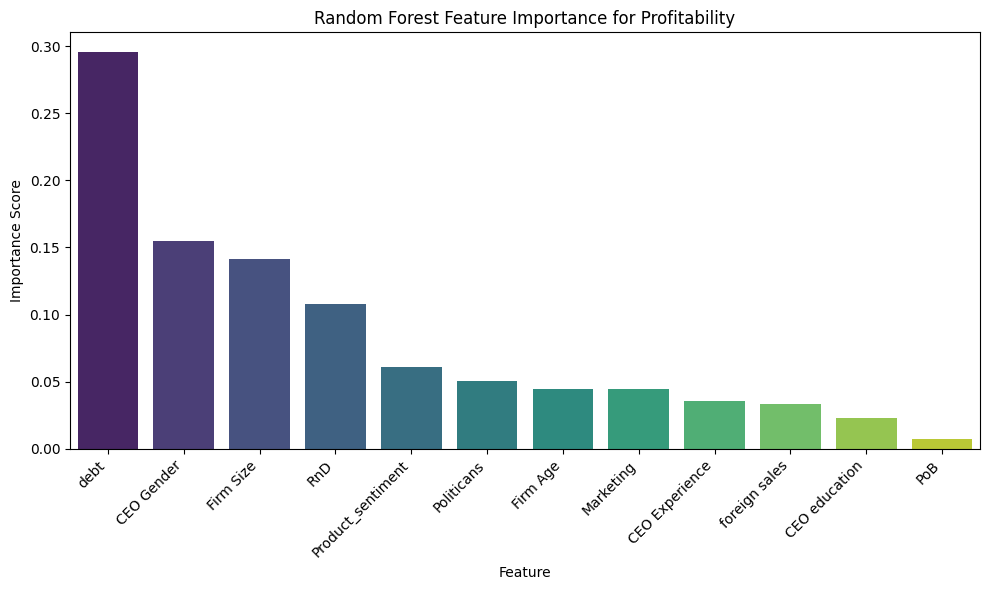

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming comparison_table_all is available from the previous cell

# Use Random Forest Importance for a bar plot
rf_importance = comparison_table_all['Random Forest Importance'].sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance.index, y=rf_importance.values, palette='viridis')
plt.title('Random Forest Feature Importance for Profitability')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##High Inflation


In [9]:
import pandas as pd
excel_file_path = '/content/sample_data/cw4 high inflation .xlsx'
df = pd.read_excel(excel_file_path)
print(df.columns)

Index(['id', 'Profitability', 'High inflation Probability', 'New Profit',
       'debt', 'RnD', 'Firm Age', 'Firm Size', 'CEO Experience',
       'foreign sales', 'CEO education', 'CEO Gender', 'Marketing',
       'Product_sentiment', 'Politicans', 'PoB'],
      dtype='object')


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Assuming df is already loaded from 'cw4 high inflation .xlsx'

# Define features (X) and target (y)
feature_cols_high_inflation = ['Profitability', 'High inflation Probability', 'debt', 'RnD', 'Firm Age', 'CEO Experience', 'foreign sales', 'CEO education',  'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_high_inflation = df[feature_cols_high_inflation]
y_high_inflation = df['New Profit']

# Split data into training and testing sets (80/20 rule)
X_train_high_inflation, X_test_high_inflation, y_train_high_inflation, y_test_high_inflation = train_test_split(
    X_high_inflation, y_high_inflation, test_size=0.2, random_state=42
)

# Train a Random Forest Regressor model
model_high_inflation = RandomForestRegressor(n_estimators=100, random_state=42)
model_high_inflation.fit(X_train_high_inflation, y_train_high_inflation)

# Make predictions on the test set
y_pred_high_inflation = model_high_inflation.predict(X_test_high_inflation)

# Evaluate the model
mae_high_inflation = mean_absolute_error(y_test_high_inflation, y_pred_high_inflation)
mse_high_inflation = mean_squared_error(y_test_high_inflation, y_pred_high_inflation)
r2_high_inflation = r2_score(y_test_high_inflation, y_pred_high_inflation)

print(f"Random Forest Model Evaluation for 'New Profit':")
print(f"Mean Absolute Error (MAE): {mae_high_inflation:.2f}")
print(f"Mean Squared Error (MSE): {mse_high_inflation:.2f}") # Corrected variable name
print(f"R-squared (R2): {r2_high_inflation:.2f}")

Random Forest Model Evaluation for 'New Profit':
Mean Absolute Error (MAE): 0.79
Mean Squared Error (MSE): 1.39
R-squared (R2): 0.90


In [12]:
# Get feature importances from the trained Random Forest model
feature_importances_high_inflation = model_high_inflation.feature_importances_

# Create a pandas Series for better visualization
feature_importance_series_high_inflation = pd.Series(feature_importances_high_inflation, index=X_high_inflation.columns)

# Sort the features by importance
sorted_feature_importances_high_inflation = feature_importance_series_high_inflation.sort_values(ascending=False)

# Print the feature importance scores
print("Random Forest Feature Importances for 'New Profit':")
display(sorted_feature_importances_high_inflation)

Random Forest Feature Importances for 'New Profit':


,0
Profitability,0.792792
High inflation Probability,0.105723
debt,0.023403
Firm Age,0.021426
Marketing,0.017714
RnD,0.008740
foreign sales,0.008071
Product_sentiment,0.007331
PoB,0.007181
CEO education,0.006544


In [13]:
from sklearn.linear_model import Lasso
import pandas as pd

# Assuming X_high_inflation and y_high_inflation are already defined

# Initialize and fit the LASSO model
# You might need to tune the alpha parameter based on your data
lasso_high_inflation = Lasso(alpha=0.1, random_state=42) # alpha is the regularization strength
lasso_high_inflation.fit(X_high_inflation, y_high_inflation)

# Get the coefficients
lasso_coefficients_high_inflation = pd.Series(lasso_high_inflation.coef_, index=X_high_inflation.columns)

# Print the coefficients
print("LASSO Coefficients for 'New Profit':")
display(lasso_coefficients_high_inflation.sort_values(ascending=False))

LASSO Coefficients for 'New Profit':


,0
High inflation Probability,3.641456
Profitability,0.428010
foreign sales,0.007325
RnD,0.003215
CEO Gender,0.000000
Firm Age,-0.000000
CEO Experience,-0.000000
CEO education,0.000000
Product_sentiment,0.000000
Marketing,-0.000000


In [3]:
from sklearn.linear_model import Lasso
import pandas as pd

# Load the dataframe
excel_file_path = '/content/sample_data/cw4 high inflation .xlsx'
df = pd.read_excel(excel_file_path)

# Define the reduced set of features (X)
feature_cols_reduced = ['Profitability', 'High inflation Probability', 'debt', 'RnD', 'foreign sales']
X_reduced = df[feature_cols_reduced]
y_reduced = df['New Profit']

# Initialize and fit the LASSO model with the reduced feature set
# You might need to tune the alpha parameter based on your data
lasso_reduced = Lasso(alpha=0.1, random_state=42) # alpha is the regularization strength
lasso_reduced.fit(X_reduced, y_reduced)

# Get the coefficients
lasso_coefficients_reduced = pd.Series(lasso_reduced.coef_, index=X_reduced.columns)

# Print the coefficients
print("LASSO Coefficients for 'New Profit' (Reduced Features):")
display(lasso_coefficients_reduced.sort_values(ascending=False))

LASSO Coefficients for 'New Profit' (Reduced Features):


,0
High inflation Probability,3.641456
Profitability,0.428010
foreign sales,0.007325
RnD,0.003215
debt,-0.003995


In [4]:
import pandas as pd
import statsmodels.api as sm

# Load the dataframe
excel_file_path = '/content/sample_data/cw4 high inflation .xlsx'
df = pd.read_excel(excel_file_path)

# Define the features (X) and the target variable (y)
feature_cols_ols_high_inflation = ['Profitability', 'High inflation Probability', 'debt', 'RnD', 'Firm Age', 'CEO Experience', 'foreign sales', 'CEO education',  'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_ols_high_inflation = df[feature_cols_ols_high_inflation]
y_ols_high_inflation = df['New Profit']

# Add a constant (intercept) to the features
X_ols_high_inflation = sm.add_constant(X_ols_high_inflation)

# Create and fit the OLS model with robust standard errors
model_ols_high_inflation = sm.OLS(y_ols_high_inflation, X_ols_high_inflation)
results_ols_high_inflation = model_ols_high_inflation.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print("OLS Regression Results for 'New Profit' (with Robust Standard Errors):")
print(results_ols_high_inflation.summary())

OLS Regression Results for 'New Profit' (with Robust Standard Errors):
                            OLS Regression Results                            
Dep. Variable:             New Profit   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     16.26
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           3.07e-19
Time:                        12:04:56   Log-Likelihood:                -294.05
No. Observations:                 122   AIC:                             614.1
Df Residuals:                     109   BIC:                             650.5
Df Model:                          12                                         
Covariance Type:                  HC1                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------

In [7]:
# Get OLS coefficients and p-values
ols_coefficients = results_ols_high_inflation.params
ols_pvalues = results_ols_high_inflation.pvalues

# Filter: keep only variables with p < 0.1
significant_vars = ols_pvalues[ols_pvalues < 0.1].index
print("Significant OLS variables (p < 0.1):")
print(significant_vars)


Significant OLS variables (p < 0.1):
Index(['Profitability', 'High inflation Probability'], dtype='object')


In [14]:
import pandas as pd
import statsmodels.api as sm

# Assuming df is already loaded from 'cw4 high inflation .xlsx'

# Define the reduced set of features (X) based on p-values < 0.1 from the previous OLS
feature_cols_ols_reduced = ['Profitability', 'High inflation Probability']
X_ols_reduced = df[feature_cols_ols_reduced]
y_ols_reduced = df['New Profit'] # Target variable remains the same

# Add a constant (intercept) to the features
X_ols_reduced = sm.add_constant(X_ols_reduced)

# Create and fit the OLS model with robust standard errors using the reduced feature set
model_ols_reduced = sm.OLS(y_ols_reduced, X_ols_reduced)
results_ols_reduced = model_ols_reduced.fit(cov_type='HC1') # HC1 is a common type of robust standard error

# Print the summary of the regression results
print("OLS Regression Results for 'New Profit' (Reduced Features with Robust Standard Errors):")
print(results_ols_reduced.summary())

OLS Regression Results for 'New Profit' (Reduced Features with Robust Standard Errors):
                            OLS Regression Results                            
Dep. Variable:             New Profit   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     47.50
Date:                Thu, 23 Oct 2025   Prob (F-statistic):           6.83e-16
Time:                        12:17:19   Log-Likelihood:                -295.76
No. Observations:                 122   AIC:                             597.5
Df Residuals:                     119   BIC:                             605.9
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Assuming df is already loaded from 'cw4 high inflation .xlsx'

# Define the features for PCA
feature_cols_pca_new = ['Profitability', 'High inflation Probability', 'debt', 'RnD', 'Firm Age', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_pca_new = df[feature_cols_pca_new]

# Standardize the features
scaler_new = StandardScaler()
X_pca_scaled_new = scaler_new.fit_transform(X_pca_new)

# Perform PCA
pca_new = PCA()
X_pca_transformed_new = pca_new.fit_transform(X_pca_scaled_new)

# Get the loading factors
loading_factors_new = pd.DataFrame(pca_new.components_.T, columns=[f'PC{i+1}' for i in range(pca_new.n_components_)], index=feature_cols_pca_new)

# Display the loading factors
print("PCA Loading Factors (New Data):")
display(loading_factors_new)

PCA Loading Factors (New Data):


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Profitability,0.483740,0.307613,-0.024141,-0.175321,-0.089425,0.063492,0.102990,-0.116434,-0.125583,0.542454,0.541972,-0.009824
High inflation Probability,0.067285,-0.030630,0.427911,0.027934,0.091021,0.706428,0.411039,0.184489,-0.016239,-0.276648,0.151962,-0.021008
debt,-0.254656,-0.361388,-0.059017,0.069841,0.582280,-0.067272,0.197396,0.320903,-0.073367,0.487256,0.078571,-0.248382
RnD,0.270022,-0.001018,0.323451,-0.179722,0.397143,-0.455963,0.204093,-0.239503,0.453098,-0.285041,0.132171,-0.146667
Firm Age,0.226662,-0.286218,0.214858,0.537936,-0.170229,-0.241869,-0.271701,0.201836,-0.269116,-0.220093,0.392685,-0.232511
CEO Experience,0.128482,0.309542,0.421951,0.544773,0.036759,-0.127822,0.119976,0.049988,0.081925,0.349391,-0.411965,0.282439
foreign sales,-0.124060,0.500310,-0.218833,0.170858,0.238152,0.111069,-0.336549,0.435394,0.432908,-0.126724,0.283859,0.035891
CEO education,0.441676,-0.294719,-0.352093,-0.004518,0.139208,-0.083196,0.179858,0.308389,-0.022468,-0.155706,-0.016978,0.644424
CEO Gender,0.528394,0.117305,-0.317693,0.059989,0.057270,0.134574,0.036457,0.141817,-0.016694,-0.067431,-0.462682,-0.583764
Marketing,-0.090200,-0.215057,-0.359004,0.439564,-0.305674,0.091654,0.387228,-0.267035,0.507774,0.088669,0.163954,-0.088573


In [17]:
#Find max loading per feature
abs_loading = loading_factors_new.abs()

max_loading_per_feature = pd.DataFrame({
    'Highest Absolute Loading': abs_loading.max(axis=1),
    'Principal Component (PC)': abs_loading.idxmax(axis=1)
}).sort_values(by='Highest Absolute Loading', ascending=False)

print("Highest PCA Loading per Feature (High Inflation Data):")
display(max_loading_per_feature)

Highest PCA Loading per Feature (High Inflation Data):


,Highest Absolute Loading,Principal Component (PC)
High inflation Probability,0.706428,PC6
CEO education,0.644424,PC12
CEO Gender,0.583764,PC12
debt,0.582280,PC5
CEO Experience,0.544773,PC4
Profitability,0.542454,PC10
Firm Age,0.537936,PC4
PoB,0.521263,PC7
Marketing,0.507774,PC9
foreign sales,0.500310,PC2


In [18]:
#Filter by loading strength (≥ 0.5)
important_pca_features = max_loading_per_feature[max_loading_per_feature['Highest Absolute Loading'] >= 0.5]

print("Features kept after PCA filtering (|loading| ≥ 0.5):")
display(important_pca_features)

Features kept after PCA filtering (|loading| ≥ 0.5):


,Highest Absolute Loading,Principal Component (PC)
High inflation Probability,0.706428,PC6
CEO education,0.644424,PC12
CEO Gender,0.583764,PC12
debt,0.582280,PC5
CEO Experience,0.544773,PC4
Profitability,0.542454,PC10
Firm Age,0.537936,PC4
PoB,0.521263,PC7
Marketing,0.507774,PC9
foreign sales,0.500310,PC2


In [33]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # Import train_test_split

# Assuming df is already loaded from 'cw4 high inflation .xlsx'
# If not, you would need to add the code to load it here:
excel_file_path = '/content/sample_data/cw4 high inflation .xlsx'
df = pd.read_excel(excel_file_path)


# Define features (X) and target (y) for LASSO, OLS, and Random Forest
feature_cols_high_inflation = ['Profitability', 'High inflation Probability', 'debt', 'RnD', 'Firm Age', 'CEO Experience', 'foreign sales', 'CEO education',  'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_high_inflation = df[feature_cols_high_inflation]
y_high_inflation = df['New Profit']

# Split data for Random Forest (needed to train the model for feature importances)
X_train_high_inflation, X_test_high_inflation, y_train_high_inflation, y_test_high_inflation = train_test_split(
    X_high_inflation, y_high_inflation, test_size=0.2, random_state=42
)

# --- Random Forest Important Features (Importance > mean importance) ---
# Train a Random Forest Regressor model
model_high_inflation = RandomForestRegressor(n_estimators=100, random_state=42)
model_high_inflation.fit(X_train_high_inflation, y_train_high_inflation)

# Get feature importances from the trained Random Forest model
feature_importances_high_inflation = model_high_inflation.feature_importances_
rf_importance_series = pd.Series(feature_importances_high_inflation, index=X_high_inflation.columns)

# Define importance threshold (e.g., greater than the mean importance)
mean_importance = rf_importance_series.mean()
rf_important_features = rf_importance_series[rf_importance_series > mean_importance].index.tolist()


# --- LASSO Important Features (Non-zero coefficients) ---
# Recalculate LASSO coefficients
lasso_high_inflation = Lasso(alpha=0.1, random_state=42)
lasso_high_inflation.fit(X_high_inflation, y_high_inflation)
lasso_coefficients_high_inflation = pd.Series(lasso_high_inflation.coef_, index=X_high_inflation.columns)

lasso_important_features = lasso_coefficients_high_inflation[lasso_coefficients_high_inflation != 0].index.tolist()

# --- OLS Important Features (p < 0.1) ---
# Calculate OLS results
X_ols_high_inflation = sm.add_constant(X_high_inflation)
model_ols_high_inflation = sm.OLS(y_high_inflation, X_ols_high_inflation)
results_ols_high_inflation = model_ols_high_inflation.fit(cov_type='HC1') # HC1 is a common type of robust standard error

ols_pvalues_high_inflation = results_ols_high_inflation.pvalues
ols_important_features = ols_pvalues_high_inflation[ols_pvalues_high_inflation < 0.1].index.tolist()
# Remove the 'const' if it's included
if 'const' in ols_important_features:
    ols_important_features.remove('const')


# --- PCA Important Features (Loading factors >= 0.5) ---
# Define the features for PCA
feature_cols_pca_new = ['Profitability', 'High inflation Probability', 'debt', 'RnD', 'Firm Age', 'CEO Experience', 'foreign sales', 'CEO education', 'CEO Gender', 'Marketing', 'Product_sentiment', 'PoB']
X_pca_new = df[feature_cols_pca_new]

# Standardize the features
scaler_new = StandardScaler()
X_pca_scaled_new = scaler_new.fit_transform(X_pca_new)

# Perform PCA
pca_new = PCA()
X_pca_transformed_new = pca_new.fit_transform(X_pca_scaled_new)

# Get the loading factors
loading_factors_new = pd.DataFrame(pca_new.components_.T, columns=[f'PC{i+1}' for i in range(pca_new.n_components_)], index=feature_cols_pca_new)

abs_loading_new = loading_factors_new.abs()
max_loading_per_feature_new = pd.DataFrame({
    'Highest Absolute Loading': abs_loading_new.max(axis=1),
    'Principal Component (PC)': abs_loading_new.idxmax(axis=1)
})
pca_important_features = max_loading_per_feature_new[max_loading_per_feature_new['Highest Absolute Loading'] >= 0.5].index.tolist()

# --- Create the Comparison Table ---

# Get all unique features from the three lists
all_features = sorted(list(set(lasso_important_features + ols_important_features + pca_important_features + rf_important_features))) # Include RF features

# Create a DataFrame to store the comparison
xai_comparison_table = pd.DataFrame(index=all_features)

# Mark features as important based on each method
xai_comparison_table['LASSO (Non-zero Coef)'] = xai_comparison_table.index.isin(lasso_important_features)
xai_comparison_table['OLS (p < 0.1)'] = xai_comparison_table.index.isin(ols_important_features)
xai_comparison_table['PCA (|Loading| ≥ 0.5)'] = xai_comparison_table.index.isin(pca_important_features)
xai_comparison_table['Random Forest (Importance > Mean)'] = xai_comparison_table.index.isin(rf_important_features) # Add RF column


# Display the comparison table
print("Explainable AI (XAI) Comparison Table:")
display(xai_comparison_table)

Explainable AI (XAI) Comparison Table:


,LASSO (Non-zero Coef),OLS (p < 0.1),PCA (|Loading| ≥ 0.5),Random Forest (Importance > Mean)
CEO Experience,False,False,True,False
CEO Gender,False,False,True,False
CEO education,False,False,True,False
Firm Age,False,False,True,False
High inflation Probability,True,True,True,True
Marketing,False,False,True,False
PoB,False,False,True,False
Profitability,True,True,True,True
RnD,True,False,False,False
debt,True,False,True,False


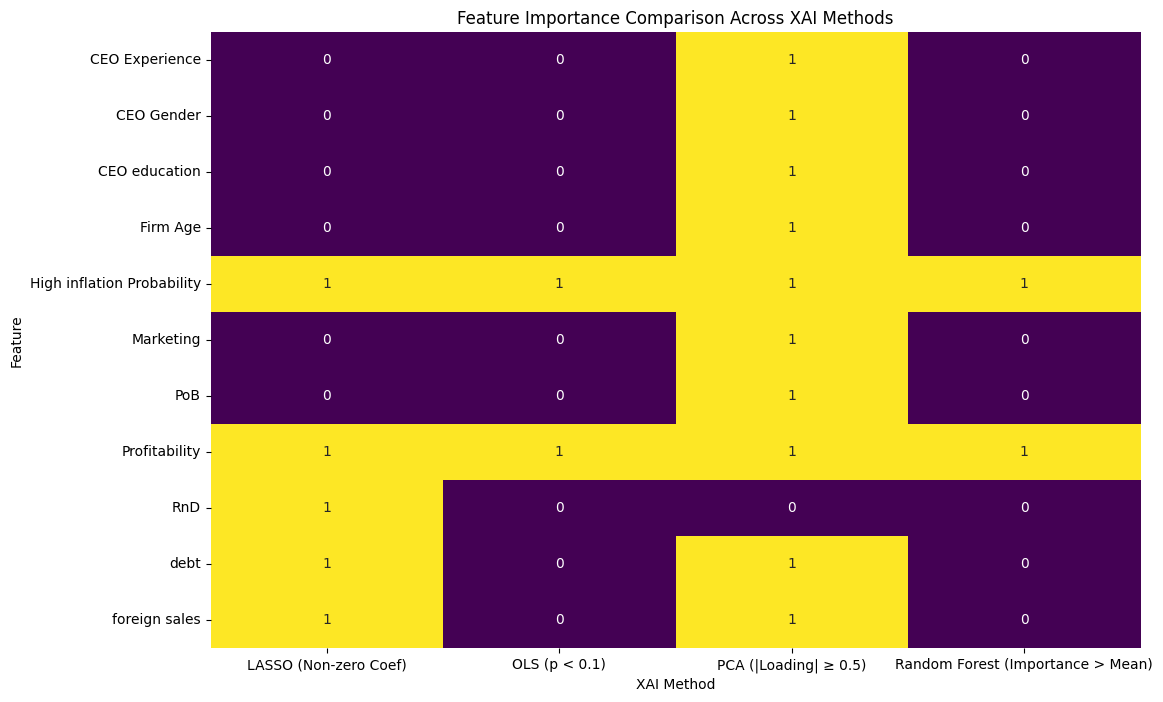

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming xai_comparison_table is available from the previous cell

# Convert boolean values to integers (True=1, False=0) for plotting
xai_comparison_table_numeric = xai_comparison_table.astype(int)

# Create a heatmap or a bar plot for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(xai_comparison_table_numeric, annot=True, cmap='viridis', cbar=False, fmt='d')
plt.title('Feature Importance Comparison Across XAI Methods')
plt.xlabel('XAI Method')
plt.ylabel('Feature')
plt.show()